# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

	State	TotalPop	Hispanic	White	Black	Native	Asian	Pacific	Income	GenderPop
0	Alabama	4830620	3.75%	61.88%	31.25%	0.45%	1.05%	0.03%	$43,296.36	2341093M_2489527F
1	Alaska	733375	5.91%	60.91%	2.85%	16.39%	5.45%	1.06%	$70,354.74	384160M_349215F
2	Arizona	6641928	29.57%	57.12%	3.85%	4.36%	2.88%	0.17%	$54,207.82	3299088M_3342840F
3	Arkansas	2958208	6.22%	71.14%	18.97%	0.52%	1.14%	0.15%	$41,935.63	1451913M_1506295F
4	California	38421464	37.29%	40.22%	5.68%	0.41%	13.05%	0.35%	$67,264.78	19087135M_19334329F
5	Colorado	5278906	20.78%	69.90%	3.55%	0.57%	2.66%		$64,657.80	2648667M_2630239F

The above is a crude copy and paste from a preview of one of the csv files. It seems to hold population and demographic data by state and broken down by race. There is a gender breakdown as well but it is in one column which is not tidy. We would need to clean this before attempting the request from my boss.


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

dataframes = []

for f in glob.glob('states*.csv'):
    tempframe=pd.read_csv(f)
    dataframes.append(tempframe)

us_census = pd.concat(dataframes)

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [59]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


Looking at Income and GenderPop they are object type which should not be the case if I am going to create a scatterplot using these columns. I need some sort of numeric datatype.

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [60]:
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [61]:
us_census.Income = us_census['Income'].str.replace('\$|,','',regex=True)
print(us_census.Income.head())

0    59125.27 
1    46296.81 
2    51805.41 
3    47328.08 
4    55874.52 
Name: Income, dtype: object


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [62]:
gender_split =  us_census['GenderPop'].str.split('_',expand=True)
print(gender_split.head())

           0          1
0    510388M    543273F
1   2322409M   2455167F
2    423477M    419713F
3   3167756M   3331859F
4  13171316M  13367298F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [63]:
us_census['Female_Population']=gender_split[1].str.replace('F','',regex=True)
us_census['Male_Population']=gender_split[0].str.replace('M','',regex=True)
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific     Income            GenderPop Female_Population  \
0  3.25%   0.04%  59125.27       510388M_543273F            543273   
1  1.25%   0.05%  46296.81     2322409M_2455167F           2455167   
2  1.02%   0.04%  51805.41       423477M_419713F            419713   
3  1.41%   0.04%  47328.08     3167756M_3331859F           3331859   
4  3.67%   0.07%  55874.52   13171316M_13367298F          13367298   

  Male_Population  
0          510388  
1         2322409  
2          423477  
3         3167756  
4        13171316  


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

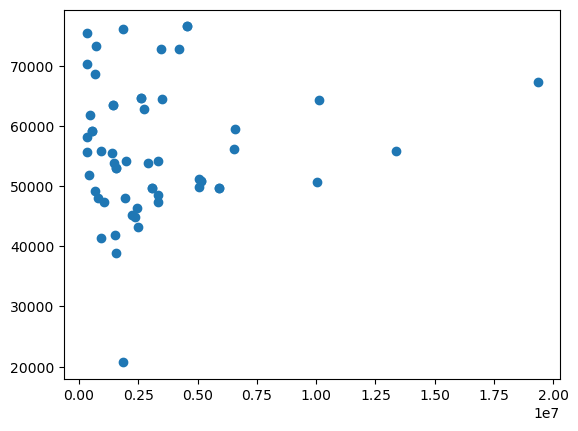

In [64]:
us_census.Female_Population=pd.to_numeric(us_census.Female_Population)
us_census.Male_Population=pd.to_numeric(us_census.Male_Population)
us_census.Income = pd.to_numeric(us_census.Income)

plt.scatter(us_census.Female_Population,us_census.Income)
plt.show()


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [65]:
print(us_census.Female_Population.isnull().sum())
us_census['Female_Population'] = us_census['Female_Population'].fillna(us_census['TotalPop'] - us_census['Male_Population'])
print(us_census.Female_Population.isnull().sum())

3
0


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [66]:
print(us_census.duplicated(subset = us_census.columns[1:]).sum())

9


11. Drop those duplicates using the `.drop_duplicates()` function.

In [67]:
us_census=us_census.drop_duplicates(subset = us_census.columns[1:])
print(us_census.duplicated().sum())

0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

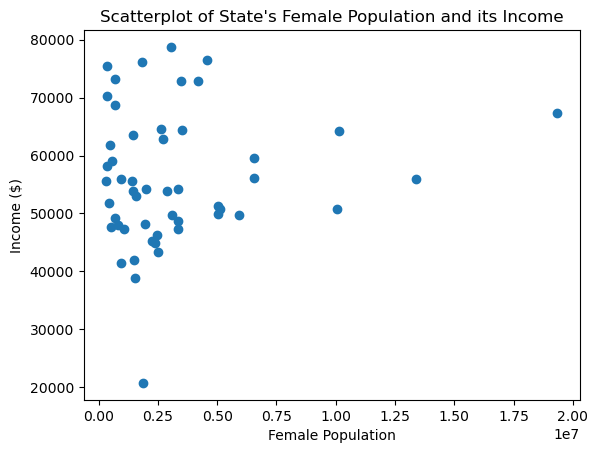

In [68]:
plt.title("Scatterplot of State's Female Population and its Income")
plt.ylabel("Income ($)")
plt.xlabel("Female Population")
plt.scatter(us_census.Female_Population,us_census.Income)
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [69]:
print(us_census.columns)
races = ['Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific']

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop',
       'Female_Population', 'Male_Population'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [70]:
for race in races:
    us_census[race]=us_census[race].str.replace('%','',regex=True)
for race in races:
    us_census[race]=pd.to_numeric(us_census[race])

The code above replaces all ' % ' signs from the race columns and then converts the remaing number into a float data type.

In [71]:
for race in races:
    print(us_census[race].head()[-1:])
    print(us_census[race].dtypes)

4    38.05
Name: Hispanic, dtype: float64
float64
4    44.69
Name: White, dtype: float64
float64
4    11.65
Name: Black, dtype: float64
float64
4    0.26
Name: Native, dtype: float64
float64
4    3.67
Name: Asian, dtype: float64
float64
4    0.07
Name: Pacific, dtype: float64
float64


This code shows the first value in each racial column and shows the data type of each column. This is to prove that each racial column is now numeric and ready to be used for visualization.

In [172]:
for race in races:
    print(race,us_census[race].isnull().sum())

Hispanic 0
White 0
Black 0
Native 0
Asian 0
Pacific 0


We also want to check if there are any null values in our racial columns since this can mess with any calculations we do on it. As the above code block execution shows, the Pacific column has 4 nulls. The below code block execution will fill these with 0 as I assume that there is no Pacific representation in these states. I also could replace with the sum of the other racial categories and subtract it from 100, but that also assumes that remaining difference is all Pacific. I went state by state and added all the racial percentages and I did not get 100% as I should have if this data accurately reflected the state's racial demographic. As I do not want to alter the data any further, I just wanted to make this point in order to explain my action.

In [ ]:
us_census['Pacific'] = us_census['Pacific'].fillna(0)
print(us_census.Pacific.isnull().sum())

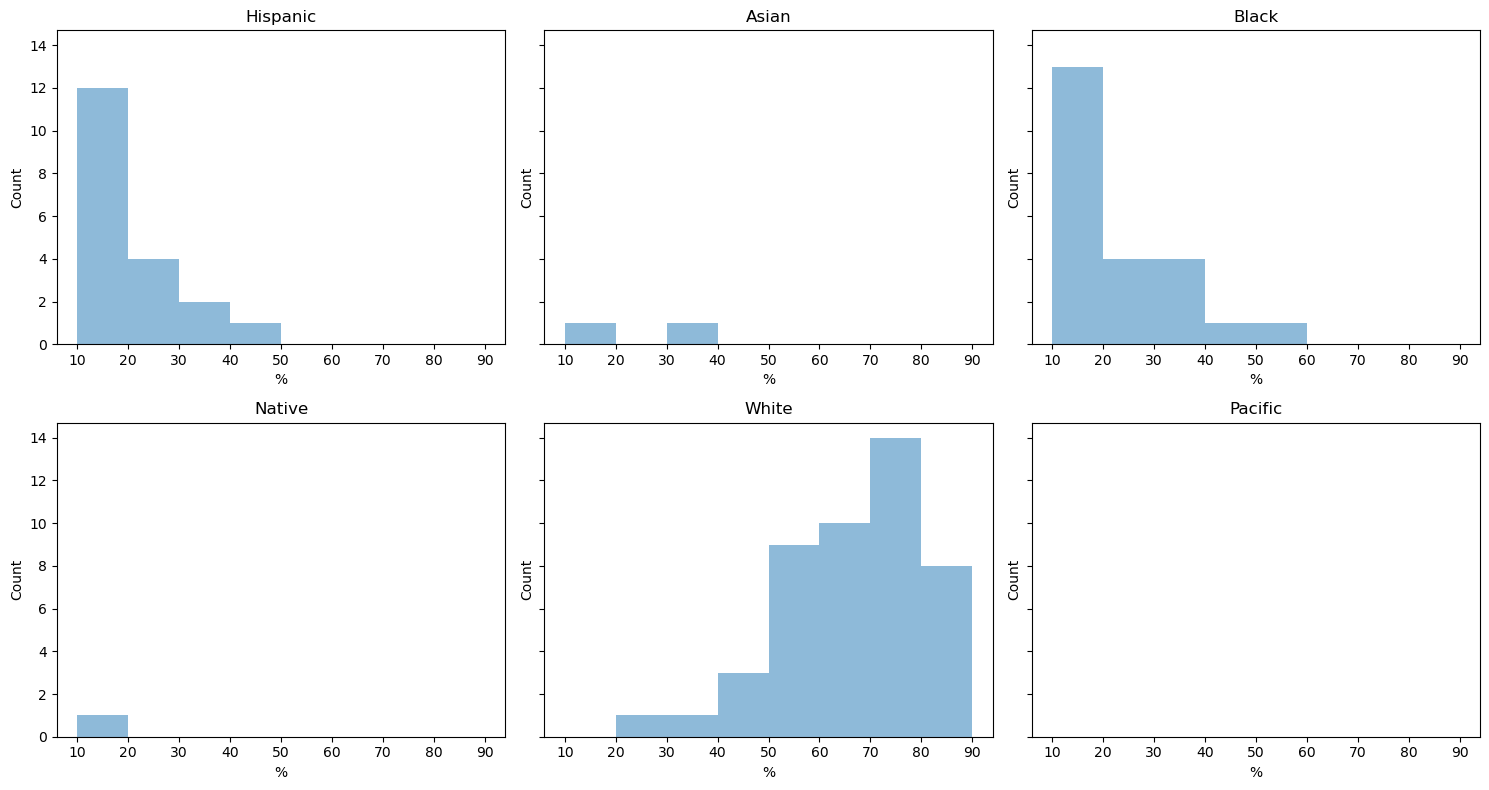

In [137]:
fig, axs = plt.subplots(2, 3,figsize=(15, 8),sharey=True)
plt.title("Hello")
plt.setp(axs, xticks=[x for x in range(10,100,10)])
plt.setp(axs[:], xlabel='%')
plt.setp(axs[:], ylabel='Count')
for race in races:
    i=races.index(race)%2
    j=races.index(race)%3
    # print(i,j)
    axs[i, j].hist(us_census[race],alpha=0.5,label=race,bins=[i for i in range(10,100,10)])
    axs[i, j].title.set_text(race)

plt.tight_layout()


15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

In [78]:
us_census["Female_Percentage"] = (us_census.Female_Population/us_census.TotalPop)*100
print(us_census.Female_Percentage.head())

0    51.560511
1    51.389387
2    49.776800
3    51.262406
4    50.369239
Name: Female_Percentage, dtype: float64


With this above code block execution I am creating a new column for the percentage of the total population that is female for each state. 

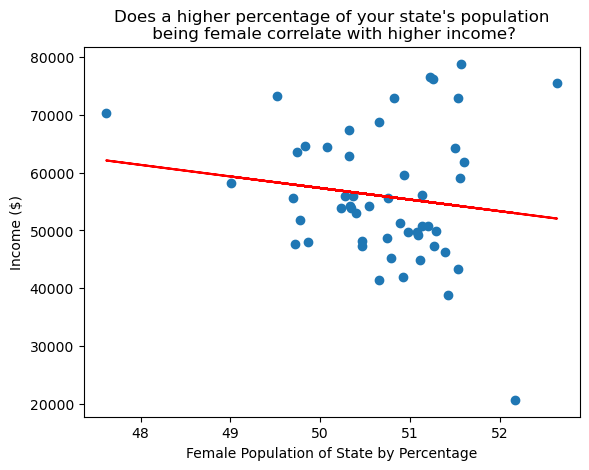

<Figure size 640x480 with 0 Axes>

In [173]:
plt.scatter(us_census.Female_Percentage,us_census.Income)
m, b = np.polyfit(us_census.Female_Percentage,us_census.Income, 1)
plt.plot(us_census.Female_Percentage, m*us_census.Female_Percentage + b, color='red')
plt.title("Does a higher percentage of your state's population\n being female correlate with higher income?")
plt.ylabel("Income ($)")
plt.xlabel("Female Population of State by Percentage")
plt.show()
plt.clf()

It should be noted in the above scatter plot, there does not seem to be a strong linear correlation between high amount of females and a higher income. The line of best fit is just an estimate.

The above is a pie chart of the average percent of race across all states. I found the mean of the entire column of each race category in order to do this. 

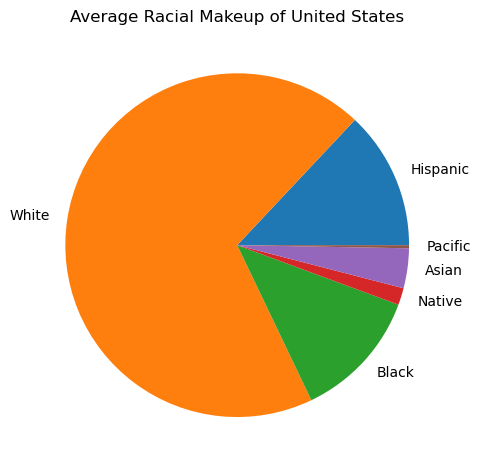

In [167]:
race_means={}
for race in races:
    race_means[race]=us_census[race].mean()
race_means_df=pd.DataFrame.from_dict(race_means,orient='index', columns=['Mean'])
race_means_df.plot(kind='pie',y='Mean',legend=None)
plt.title("Average Racial Makeup of United States")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [131]:
def simpson_diversity_index(race_percentages):
  """
  Calculates the Simpson Diversity Index for a list of race percentages.

  Args:
      race_percentages: A list of floats representing percentages (between 0 and 1) of different races.

  Returns:
      The Simpson Diversity Index (float).
  """
  # Calculate the sum of squared percentages
  sum_of_squares = sum((p/100)**2 for p in race_percentages)

  # Calculate the SDI (1 - sum of squared percentages)
  sdi = 1 - sum_of_squares

  return sdi

The above function takes a list of race percentages and returns a simpson diversity index which measures diversity.  A high value means no particular race is more prevalent than the others. And a low value means one race is more present than others. I will create a new column in the us_census dataframe that will hold this diversity index and then hope to plot it against income and see if there is any correlation.

In [170]:
us_census['SDI'] = simpson_diversity_index([us_census.White,us_census.Black,us_census.Asian,
                                            us_census.Hispanic,us_census.Native,us_census.Pacific])
print(us_census.SDI.head())

0    0.425361
1    0.519103
2    0.309146
3    0.424074
4    0.640574
Name: SDI, dtype: float64


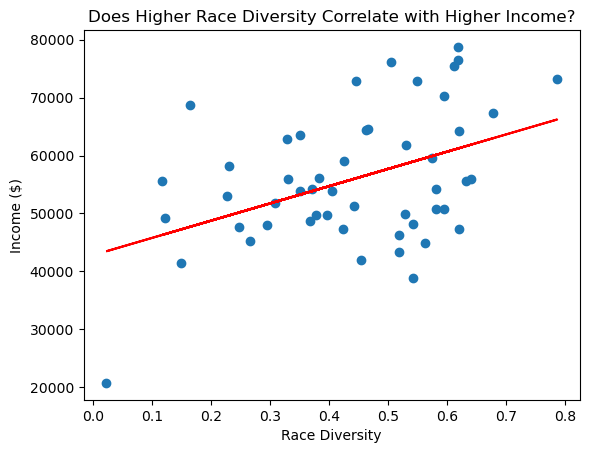

In [159]:
plt.scatter(us_census.SDI,us_census.Income)
m, b = np.polyfit(us_census.SDI,us_census.Income, 1)
plt.title("Does Higher Race Diversity Correlate with Higher Income?")
plt.plot(us_census.SDI, m*us_census.SDI + b, color='red')
plt.ylabel("Income ($)")
plt.xlabel("Race Diversity")
plt.show()

There seems to be a linear correlation between high levels of racial diversity and higher income. The dots are still pretty scattered so the correlation is not very strong with many points above and below the line of best fit.